In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import sys
import os
current_dir = os.path.abspath('.')
if current_dir not in sys.path:
    sys.path.insert(0, current_dir)

from classes.simplexTreeClassifier import SimplexTreeClassifier


In [2]:
def make_meshgrid(x, y, h=.01):
    x_min, x_max = x.min() , x.max()
    y_min, y_max = y.min() , y.max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, xy, **params):
    Z = clf.predict(xy)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [3]:
N=1000
C=1000
gamma=0.01
D=2 #dimension
t=8 #polytope order

X = np.random.normal(0,1,(N,D))
ws= np.random.normal(0,1,(t,D))
ws = ws / (np.linalg.norm(ws,axis=1).reshape(-1,1))

u=np.random.uniform(0,1,(N,1))
X=X/(np.linalg.norm(X,axis=1).reshape(-1,1))*(u**(1/D))

y=np.ones(N)

for index in range(N):
    z = 1
    for w in ws :
        if((X[index].dot(w)- 0.5 - gamma) > 0):
            z = -1
        else :
            if ((X[index].dot(w) - 0.4 -gamma) > 0):
                z =0
    y[index]=z

X=(X[y!= 0]+ [1,1])/2
y=y[y!= 0]

print("Dataset created:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Classes: {np.unique(y)}")


Dataset created:
X shape: (774, 2)
y shape: (774,)
Classes: [-1.  1.]


Running for subdivision_levels k=1
point: (0.7494030093027926, 0.9141515569117996)
containing_simplex: ['(0.5, 2.5)', '(0.0, 0.0)', '(0.8, 0.8)']
point: (0.5352605342914887, 0.662724689921745)
containing_simplex: ['(0.5, 2.5)', '(0.0, 0.0)', '(0.8, 0.8)']
point: (0.5092828524129053, 0.5422397181857482)
containing_simplex: ['(0.5, 2.5)', '(0.0, 0.0)', '(0.8, 0.8)']
point: (0.9449505507911082, 0.34553384344184207)
containing_simplex: ['(0.0, 0.0)', '(2.0, 0.0)', '(0.8, 0.8)']
point: (0.6315440464047958, 0.37677901312342527)
containing_simplex: ['(0.0, 0.0)', '(2.0, 0.0)', '(0.8, 0.8)']
point: (0.559244423209499, 0.6090679801631599)
containing_simplex: ['(0.5, 2.5)', '(0.0, 0.0)', '(0.8, 0.8)']
point: (0.4973658828234899, 0.5719607447836056)
containing_simplex: ['(0.5, 2.5)', '(0.0, 0.0)', '(0.8, 0.8)']
point: (0.32487433818532524, 0.40096826627172816)
containing_simplex: ['(0.5, 2.5)', '(0.0, 0.0)', '(0.8, 0.8)']
point: (0.8710516197927666, 0.5020270767638374)
containing_simplex: ['(0.0,

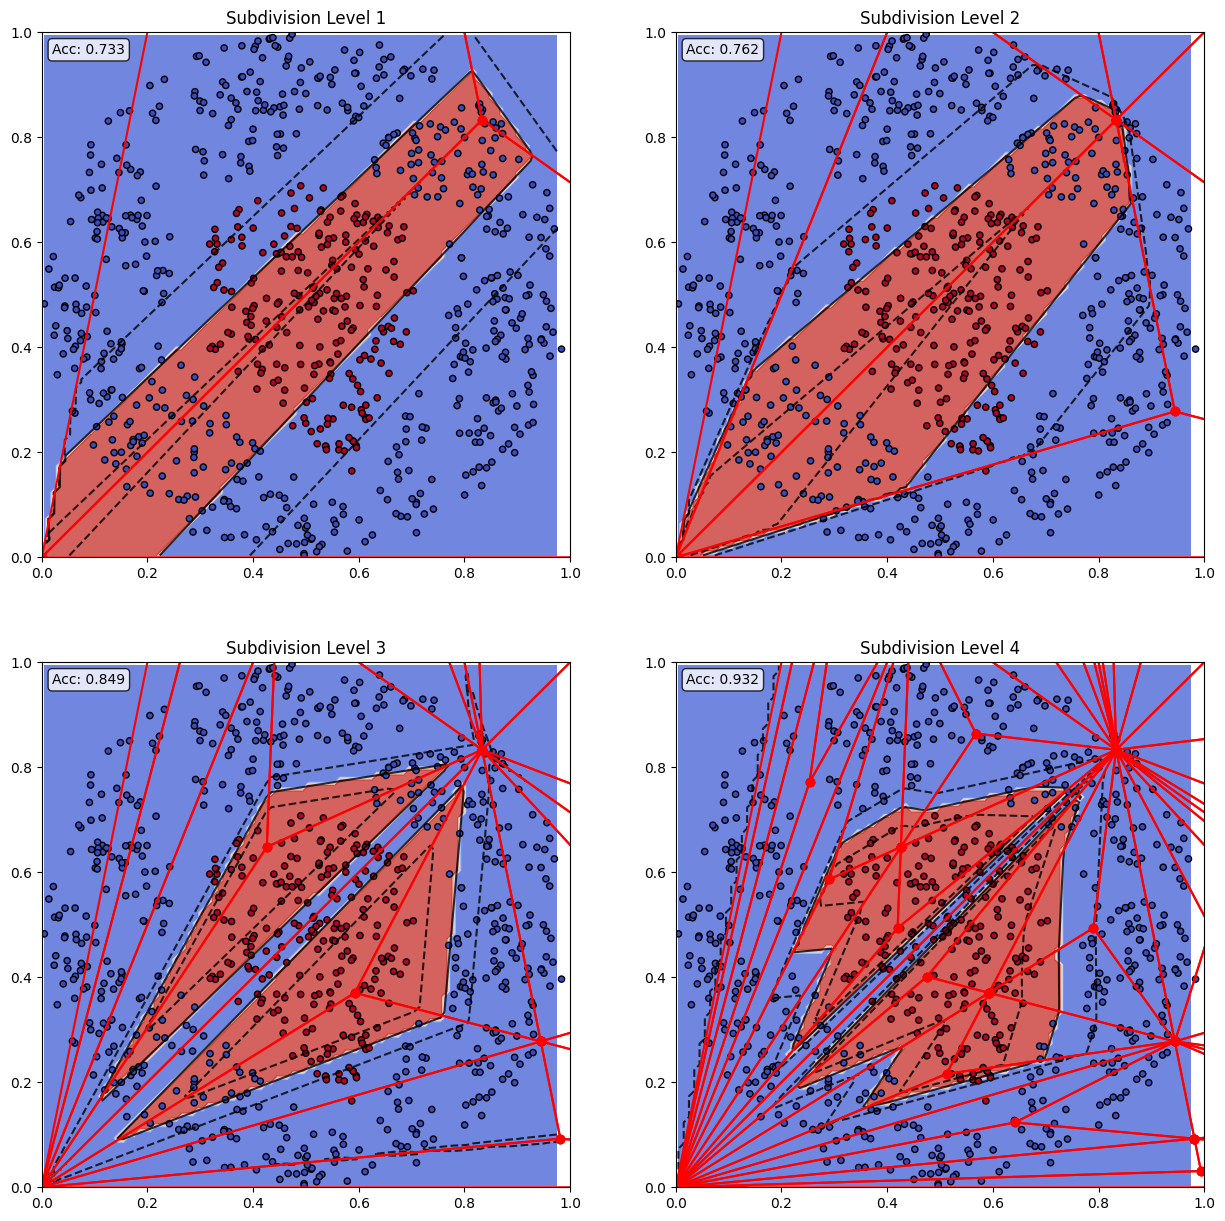

In [ ]:
fig, sub = plt.subplots(2, 2, figsize=(15, 15))
xx, yy = make_meshgrid(X[:, 0], X[:, 1])

for k, title, ax in zip(range(1, 5), range(1, 5), sub.flatten()):
    print(f"Running for subdivision_levels k={k}")
    
    model = SimplexTreeClassifier(
        vertices=[(0, 0), (2, 0), (0, 2)], # Use a triangle that contains the [0,1]x[0,1] data space
        regularization=C,
        subdivision_levels=k,
        classifier_type='svc'
    )
    
    model.fit(X, y)
    
    xy = model.transform(np.vstack([xx.ravel(), yy.ravel()]).T)

    plot_contours(ax, model.classifier, xx, yy, xy,
                 cmap=plt.cm.coolwarm, alpha=0.8)
    
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"Subdivision Level {title}")

    if hasattr(model.classifier, "decision_function"):
        Z = model.classifier.decision_function(xy).reshape(xx.shape)
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
                    linestyles=['--', '-', '--'])

    boundaries = model.get_simplex_boundaries()
    for boundary in boundaries:
        if len(boundary) >= 3:
            closed_boundary = boundary + [boundary[0]]
            x_coords = [point[0] for point in closed_boundary]
            y_coords = [point[1] for point in closed_boundary]
            ax.plot(x_coords, y_coords, 'ro-')
            
    accuracy = model.classifier.score(model.transform(X), y)
    ax.text(0.02, 0.98, f'Acc: {accuracy:.3f}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()